Данный ноутбук является бейзлайном для детекции ТЦ. Внизу ноутбука представлены идеи для улучшения точности модели.

In [1]:
# подключение библиотек
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
# подгрузка диска
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# загрузка данных с гитхаба
!git clone https://github.com/academy21/TC-Satellite-DataSet.git

Cloning into 'TC-Satellite-DataSet'...
remote: Enumerating objects: 26872, done.
remote: Counting objects: 100% (17389/17389), done.
remote: Compressing objects: 100% (8392/8392), done.
remote: Total 26872 (delta 7), reused 17373 (delta 2), pack-reused 9483
Receiving objects: 100% (26872/26872), 8.02 GiB | 38.23 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (27134/27134), done.


# Исследование данных

In [4]:
# количество изображений

# пути к изображениям
paths = ['/content/TC-Satellite-DataSet/TC_by_Classes_jpg_1',
         '/content/TC-Satellite-DataSet/TC_by_Classes_jpg_2',
         '/content/TC-Satellite-DataSet/TC_by_Classes_jpg_3',
         '/content/TC-Satellite-DataSet/TC_by_Classes_jpg_4',
         '/content/TC-Satellite-DataSet/TC_by_Classes_jpg_5'
          ]

#кол-во данных в неск. путях
def cnt_data_in_paths(paths):
  cnt_img = 0
  # кол-во данных в каждой папке
  for path in paths:
    cnt_img += sum(os.path.isfile(os.path.join(path, f)) for f in os.listdir(path))

  return cnt_img

print(f'Cnt data in dataset: {cnt_data_in_paths(paths)}')

Cnt data in dataset: 13565


In [5]:
# функция для обноружения классов ТЦ в файле
def cnt_classes_in_files(file):
  # массив с значениями класса
  x = []
  target_elem = 'C'
  # проходимся по файлу
  for elem in range(len(file)):
    if file[elem] == target_elem:
      x.append(file[elem + 6])
  return x

# функция для определения кол-ва объектов разных классов
def witch_classes(x, classes):
  for i in range(len(x)):
    elem = x[i]
    if elem in classes:
      classes[elem] += 1
    else:
      classes[elem] = 1

# классы
classes = {}

In [6]:
# кол-во train data
train_paths = [paths[0], paths[1], paths[2]]
cnt_train_data = cnt_data_in_paths(train_paths)
# кол-во val data
val_paths = [paths[3]]
cnt_val_data = cnt_data_in_paths(val_paths)
# кол-во test data
test_paths = [paths[4]]
cnt_test_data = cnt_data_in_paths(test_paths)
print(f'cnt_train_data: {cnt_train_data}, cnt_val_data: {cnt_val_data}, cnt_test_data: {cnt_test_data}')

cnt_train_data: 9470, cnt_val_data: 2717, cnt_test_data: 1378


In [7]:
# определяем кол-во различных классов ТЦ
def cnt_obj_class(path, classes):

  # переходим в директорию
  for filename in os.listdir(path):
      f = os.path.join(path, filename)

      # проверка на файл
      if os.path.isfile(f):
        with open(f) as txt:
          txt_1 = txt.read()
          txt_1 = list(txt_1)

          # считывание класса
          if len(txt_1) != 0:
            witch_classes(cnt_classes_in_files(txt_1), classes)
  return classes
# считывание количества классов
path_1 = '/content/TC-Satellite-DataSet/TC_by_Classes_txt_1'
path_2 = '/content/TC-Satellite-DataSet/TC_by_Classes_txt_2'
classes = cnt_obj_class(path_1, classes)
classes = cnt_obj_class(path_2, classes)

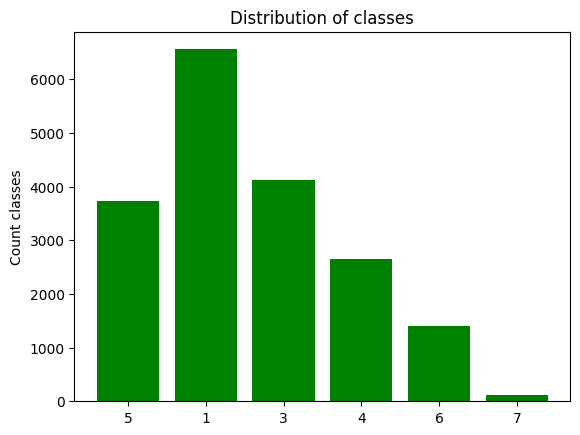

In [8]:
# построение гистограммы показывающего кол-во различных классов
fig, ax = plt.subplots()
plt.bar(classes.keys(), classes.values(), color='g')
ax.set_ylabel('Сount classes')
ax.set_title('Distribution of classes')
plt.show()

In [9]:
# функция для преобразования файла с данными о ТЦ в массив
def convert_to_array(path):
  Txt_Image = open(path)
  Txt_Image = Txt_Image.read()
  Txt_Image = Txt_Image.split(',')
  return Txt_Image

# функция для рисования текстовых данных поверх изображения
def draw_txt_info(a, Txt_Image1):
  # построение центра ТЦ
  circ = patches.Circle((int(Txt_Image1[1]), int(Txt_Image1[2])), 10, color='r')
  a.add_patch(circ)

  #координаты для boundbox'a
  x = (int(Txt_Image1[1]) - int(Txt_Image1[3]) * 0.5)
  y = (int(Txt_Image1[2]) - int(Txt_Image1[4]) * 0.5)
  w = int(Txt_Image1[3])
  h = int(Txt_Image1[4])

  # построение boundbox'а
  a.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2)).set_path_effects([patheffects.Stroke(linewidth=4, foreground='black'), patheffects.Normal()])
  a.text(x,(y-50),str(Txt_Image1[0]),verticalalignment='top',
  color='white',fontsize=10,weight='bold').set_path_effects([patheffects.Stroke(linewidth=4, foreground='black'), patheffects.Normal()])


Text(0.5, 1.0, 'Fourth')

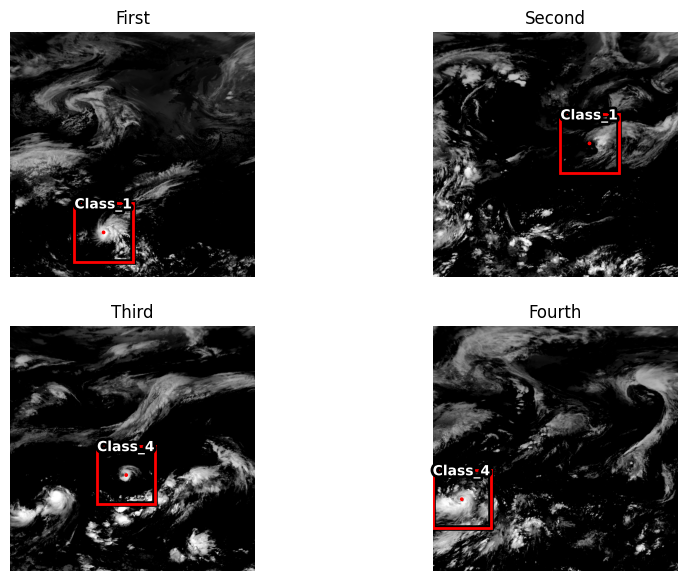

In [10]:
# вывод нескольких случайных изображений их с данными
import cv2
from matplotlib import pyplot as plt
from matplotlib import patches, text, patheffects

# создание фигуры
fig = plt.figure(figsize=(10, 7))

# настройка строк и колонок
rows = 2
columns = 2

# чтение изображений и текстовых данных
Image1 = cv2.imread('/content/TC-Satellite-DataSet/TC_by_Classes_jpg_1/mt201704250400_ir1_pro.jpg')
Txt_Image1 = convert_to_array('/content/TC-Satellite-DataSet/TC_by_Classes_txt_1/mt201704250400_ir1.txt')

Image2 = cv2.imread('/content/TC-Satellite-DataSet/TC_by_Classes_jpg_1/mt201707051200_ir1_pro.jpg')
Txt_Image2 = convert_to_array('/content/TC-Satellite-DataSet/TC_by_Classes_txt_1/mt201707051200_ir1.txt')

Image3 = cv2.imread('/content/TC-Satellite-DataSet/TC_by_Classes_jpg_1/mt201707282100_ir1_pro.jpg')
Txt_Image3 = convert_to_array('/content/TC-Satellite-DataSet/TC_by_Classes_txt_1/mt201707282100_ir1.txt')

Image4 = cv2.imread('/content/TC-Satellite-DataSet/TC_by_Classes_jpg_1/mt201708220800_ir1_pro.jpg')
Txt_Image4 = convert_to_array('/content/TC-Satellite-DataSet/TC_by_Classes_txt_1/mt201708220800_ir1.txt')

# первое изображение
a = fig.add_subplot(rows, columns, 1)
imgplot = plt.imshow(Image1)
draw_txt_info(a, Txt_Image1)
plt.axis('off')
plt.title("First")

# второе изображение
a = fig.add_subplot(rows, columns, 2)
imgplot = plt.imshow(Image2)
draw_txt_info(a, Txt_Image2)
plt.axis('off')
plt.title("Second")

# третье изображение
a = fig.add_subplot(rows, columns, 3)
imgplot = plt.imshow(Image3)
draw_txt_info(a, Txt_Image3)
plt.axis('off')
plt.title("Third")

# четвёртое изображение
a = fig.add_subplot(rows, columns, 4)
imgplot = plt.imshow(Image4)
draw_txt_info(a, Txt_Image4)
plt.axis('off')
plt.title("Fourth")

# Предобработка данных

# Обучение модели

In [ ]:
# загрузка библиотеки ultralytics
!pip install ultralytics

In [12]:
# функция для перевода txt в массив
def txt_to_list(txt):
  txt_elem = ''
  txt_new = []
  txt = list(txt)
  for elem in txt:
    if elem == ',':
      txt_new.append(txt_elem)
      txt_elem = ''
    elif elem == ' ':
      pass
    elif elem == '\n':
      txt_new.append(txt_elem)
      txt_elem = ''
    else:
      txt_elem += elem
  return txt_new

# функция для определения названия файла
def name_file(file, path):
  return file[len(path)+1:]

In [ ]:
# нормализация численных данных и замена строки 'class_n' на n
def norm_values_files(path_p, file_list, file_n):
  # объявление глобальных переменных
  global width
  global height

  # если на изображении есть хотя бы 1 объект
  if len(file_list) > 1:
    cur_path = os.path.join(path_p, file_n)
    file_name = open(cur_path, "w")

    # итерируемся по списку
    for i, elem in enumerate(file_list):
      # класс ТЦ
      if i % 5 == 0:
        elem_add = elem[6]
        with open(cur_path, 'a') as file_norm:
          file_norm.write(elem_add)
          file_norm.write(' ')
      # X координата центра или ширина
      elif i % 5 == 1 or i % 5 == 3:
        elem_add = int(elem) / width
        with open(cur_path, 'a') as file_norm:
          file_norm.write(str(elem_add))
          file_norm.write(' ')
      # Y координата центра или высота
      elif i % 5 == 2 or i % 5 == 4:
        elem_add = int(elem) / height
        with open(cur_path, 'a') as file_norm:
          file_norm.write(str(elem_add))
          file_norm.write(' ')
  # ноль объектов
  else:
    cur_path = os.path.join(path_p, file_n)
    file_name = open(cur_path, "w")



def norm_values_data(path, path_p):
  # переходим в директорию
  for filename in os.listdir(path):
      f = os.path.join(path, filename)
      # проверка на файл
      if os.path.isfile(f):
        with open(f) as txt:
          txt_n = txt.read()
          txt_n = txt_to_list(txt_n)
          path_to_labels = '/content/TC-Satellite-DataSet/TC_by_Classes_txt_1/'
          file_n = name_file(txt.name, path_to_labels)
          # считывание класса
          norm_values_files(path_p, txt_n, file_n)

# размер изображения
width, height, chn = Image1.shape

#пути до текстовых данных
path_1 = '/content/TC-Satellite-DataSet/TC_by_Classes_txt_1'
path_2 = '/content/TC-Satellite-DataSet/TC_by_Classes_txt_2'

# нормализация и запись данных в отдельные папки
path_p = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC_norm_by_Classes_txt_1'
norm_values_data(path_1, path_p)
path_p = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC_norm_by_Classes_txt_2'
norm_values_data(path_2, path_p)

In [15]:
# функция для переноса данных в train, val, test
def txt_data_to(path_to_txt_n, nec_path_tr, cnt_rem):
  iter = 1
  # перебор всех данных до cnt_rem
  for file in os.listdir(path_to_txt_n):
    new_path_txt = os.path.join(nec_path_tr, file)
    file_name = open(new_path_txt, "w")
    file_path = os.path.join(path_to_txt_n, file)
    shutil.copyfile(file_path, new_path_txt)
    if iter == cnt_rem:
      break
    iter += 1

In [16]:
# кол-во текстовых данных
txt_path = ['/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC_norm_by_Classes_txt_1']
txt_path_2 = ['/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC_norm_by_Classes_txt_2']
cnt_txt_1 = cnt_data_in_paths(txt_path)
cnt_txt_2 = cnt_data_in_paths(txt_path_2)
print(f'cnt_data: {cnt_txt_1 + cnt_txt_2}')

cnt_data: 13565


In [18]:
import glob
import shutil
# работа с первым txt файлом
path_to_txt_1 = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC_norm_by_Classes_txt_1'
nec_path_tr = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_train/TC_train_labels'

# переносим все данные из txt_1
txt_data_to(path_to_txt_1, nec_path_tr, cnt_txt_1)

# работа со вторым
path_to_txt_2 = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC_norm_by_Classes_txt_2'

# переносим оставшиеся train данные
nec_path_tr = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_train/TC_train_labels'
cnt_rem = cnt_train_data - cnt_txt_1
txt_data_to(path_to_txt_2, nec_path_tr, cnt_rem)

# переносим val data
nec_path_tr = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_valid/TC_valid_labels'
cnt_rem = cnt_val_data
txt_data_to(path_to_txt_2, nec_path_tr, cnt_rem)

# переносим test data
nec_path_tr = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_test/TC_test_labels'
cnt_rem = cnt_test_data
txt_data_to(path_to_txt_2, nec_path_tr, cnt_rem)


In [57]:
# работа с первым txt файлом
path_to_txt_1 = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC_norm_by_Classes_txt_1'
nec_path_tr = '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_train/TC_train_labels'
nec_cnt = cnt_classes_in_files('/content/TC-Satellite-DataSet/TC_by_Classes_jpg_1')
# переносим все данные из txt_1
txt_data_to(path_to_txt_1, nec_path_tr, nec_cnt)

In [52]:
# пути до папок с изображениями
paths = ['/content/TC-Satellite-DataSet/TC_by_Classes_jpg_1',
         '/content/TC-Satellite-DataSet/TC_by_Classes_jpg_2',
         '/content/TC-Satellite-DataSet/TC_by_Classes_jpg_3',
         '/content/TC-Satellite-DataSet/TC_by_Classes_jpg_4',
         '/content/TC-Satellite-DataSet/TC_by_Classes_jpg_5'
          ]

# пути до папок с train, valid, test
paths_data = ['/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_train/TC_train_img',
         '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_train/TC_train_labels',
         '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_valid/TC_valid_img',
         '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_valid/TC_valid_labels',
         '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_test/TC_test_img',
         '/content/drive/MyDrive/Sirius AI /Тропические циклоны/2 этап/TC-data/TC_test/TC_test_labels'
        ]

In [50]:
# функция для переноса изображений из одной папки в другую
def folder_move_img_to(cur_path, des_path):
  for file in list(glob(os.path.join(cur_path, '*.jpg'))):
    shutil.move(file, des_path)

In [56]:
# разделение на train, val, test
# train
cur_path = paths[0]
des_path = paths_data[0]
folder_move_img_to(cur_path, des_path)
cur_path = paths[1]
folder_move_img_to(cur_path, des_path)
cur_path = paths[2]
folder_move_img_to(cur_path, des_path)

# valid
cur_path = paths[3]
des_path = paths_data[2]
folder_move_img_to(cur_path, des_path)

# test
cur_path = paths[4]
des_path = paths_data[4]
folder_move_img_to(cur_path, des_path)

TypeError: ignored

In [64]:
from ultralytics import YOLO

# загружаем модель
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')
model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Тренируем модель
results = model.train(data='/content/YOLO_TC_data.yaml', epochs=1)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

zero-size array to reduction operation maximum which has no identity


Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        1/1         0G          0      103.1          0          0        640: 100%|██████████| 186/186 [27:33<00:00,  8.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [10:36<00:00,  7.49s/it]
                   all       2717          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

1 epochs completed in 0.637 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 168 layers, 3006818 parameters,

Данный список является далеко не полным, но даже так эти изменения могут внести весомый вклад в улучшение точности модели

* увеличить выборку изображений
* Обработать изображения с помощью различных фильтров
* Нормализовать распределение классов
* Использовать более точную модель (Например: YOLOV8x)
* Обучаться на всех тренировочной выборке
* Попробовать использовать различные гиперпараметры


